# ML - K-Means

<a id='content'></a>

## Content


### [K-Means notes](#1)

### [K-Means with Scikit-learn](#2)

### [K-Means implementation](#3)

### [Compare implementations](#4)

### [References](#refs)

### [Next steps](#next_steps)

___

<a id='1'></a>

# [^](#content) K-Means notes
___

<div style="text-align: center;">
  <img src="../images/clustering_1.png" height="85%" width="85%">
</div>

<div style="text-align: center;">
  <img src="../images/clustering_2.png" height="85%" width="85%">
</div>

<a id='2'></a>

# [^](#content) K-Means with Scikit-learn
___

## Load libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import sklearn.preprocessing as preprocessing

import warnings

warnings.filterwarnings('ignore') # suppress warnings

# parameters for graphic configurations
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Matplotlib is building the font cache; this may take a moment.


In [2]:
# load dataset 
iris = load_iris()

### About dataset

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Iris plants

Iris is a flowering plant genus of 310 accepted species with showy flowers ([Wikipedia](https://en.wikipedia.org/wiki/Iris_(plant))).

**Iris unguicularis:**

<div style="text-align: center;">
  <img src="../images/iris_unguicularis.jpg" height="80%" width="80%">
</div>

<br>

**Iris tectorum:**

<div style="text-align: center;">
  <img src="../images/iris_tectorum.jpg" height="80%" width="80%">
</div>


<br>

**Iris kemaonensis:**

<div style="text-align: center;">
  <img src="../images/iris_kemaonensis.jpg" height="80%" width="80%">
</div>

### Parts of a plant

<br>

<div style="text-align: center;">
  <img src="../images/parts_plant.jpg" height="80%" width="80%">
</div>


**Source:** https://gardeningleave.org/the-importance-of-petals-and-sepals-in-plant-reproduction/

<br>

<div style="text-align: center;">
  <img src="../images/iris_parts1.jpg" height="80%" width="80%">
</div>

<br>

<div style="text-align: center;">
  <img src="../images/iris_parts2.jpg" height="80%" width="80%">
</div>

**Source:** https://elizabethswildflowerblog.com/2017/05/26/iris-flowers-terminology-and-structure/

### Iris species of the dataset for clustering: Iris setosa, Iris versicolour, Iris virginica
                
<br>

<div style="text-align: center;">
  <img src="../images/iris_dataset.jpeg" height="100%" width="100%">
</div>

### Create a Pandas dataframe with the dataset

In [4]:
df_dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                  columns=iris['feature_names'] + ['class'])

In [5]:
df_dataset.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
4,5.0,3.6,1.4,0.2,0.0
43,5.0,3.5,1.6,0.6,0.0
16,5.4,3.9,1.3,0.4,0.0
89,5.5,2.5,4.0,1.3,1.0
145,6.7,3.0,5.2,2.3,2.0


### See correlation between variables

In [6]:
df_dataset.corr().round(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000,-0.118,0.872,0.818,0.783
sepal width (cm),-0.118,1.000,-0.428,-0.366,-0.427
petal length (cm),0.872,-0.428,1.000,0.963,0.949
petal width (cm),0.818,-0.366,0.963,1.000,0.957
class,0.783,-0.427,0.949,0.957,1.000


### Values by class

In [7]:
df_dataset['class'].value_counts()

0.0    50
1.0    50
2.0    50
Name: class, dtype: int64

### Some statistics

In [8]:
df_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Verify missing values

In [9]:
df_dataset.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

## Visualise and apply clustering

In [10]:
print(df_dataset.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')


### Select attributes for clustering

In [11]:
atr1 = df_dataset.columns[2]
atr2 = df_dataset.columns[3]

print('Setected attributes:')
print(f'atr1 = {atr1}  |  atr2 = {atr2}')

Setected attributes:
atr1 = petal length (cm)  |  atr2 = petal width (cm)


In [12]:
X = df_dataset[[atr1, atr2]].values
y = df_dataset['class'].values

**Note:** Here we have the labels $y$ available. This maybe can be considered the expected values class when $k=3$ for k-means. In a unsupervised problem we don't know the labels $y$.

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Generate subsets for iris species: iris setosa (0); iris versicolor (1); iris virginica (2)

In [14]:
def graphic_by_species(df, atr1, atr2, atr_class='class', centers=[0]):
    
    df_subset = df[[atr1, atr2, atr_class]]
    
    df_setosa = df[df[atr_class].astype(int) == 0]
    df_versicolor = df[df[atr_class].astype(int) == 1]
    df_virginica = df[df[atr_class].astype(int) == 2]
    
    
    plt.figure(figsize=(12, 6), dpi=80)

    plt.scatter(df_setosa[atr1], df_setosa[atr2], edgecolors='black', s=50, label=iris['target_names'][0])
    plt.scatter(df_versicolor[atr1], df_versicolor[atr2], edgecolors='black', s=50, label=iris['target_names'][1])
    plt.scatter(df_virginica[atr1], df_virginica[atr2], edgecolors='black', s=50, label=iris['target_names'][2])
    if len(centers) > 1:
        plt.scatter(centers[:, 0], centers[:, 1], color='red', edgecolors='black', s=500, marker='X')

    plt.xlabel(atr1)
    plt.ylabel(atr2)
    plt.legend()
    plt.show()
    
    return df_setosa, df_versicolor, df_virginica

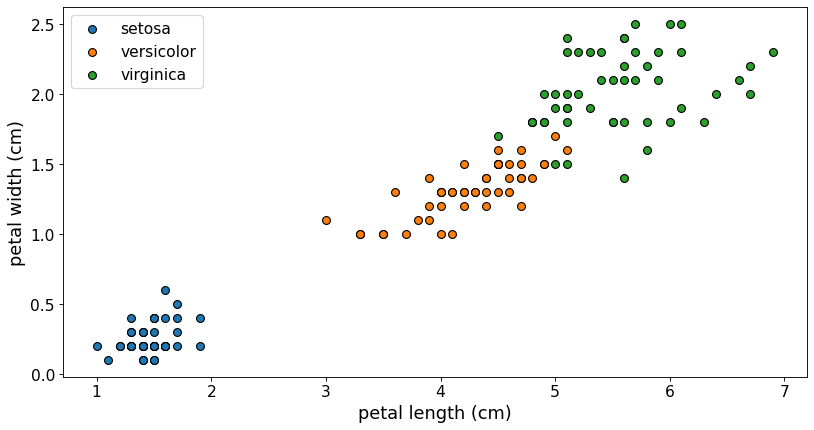

In [15]:
df_setosa, df_versicolor, df_virginica = graphic_by_species(df_dataset, atr1, atr2)

In [16]:
df_setosa.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
45,4.8,3.0,1.4,0.3,0.0
46,5.1,3.8,1.6,0.2,0.0
47,4.6,3.2,1.4,0.2,0.0
48,5.3,3.7,1.5,0.2,0.0
49,5.0,3.3,1.4,0.2,0.0


## Clustering with k-means implmentation of Scikit-learn

In [17]:
X = df_dataset[[atr1, atr2]].values

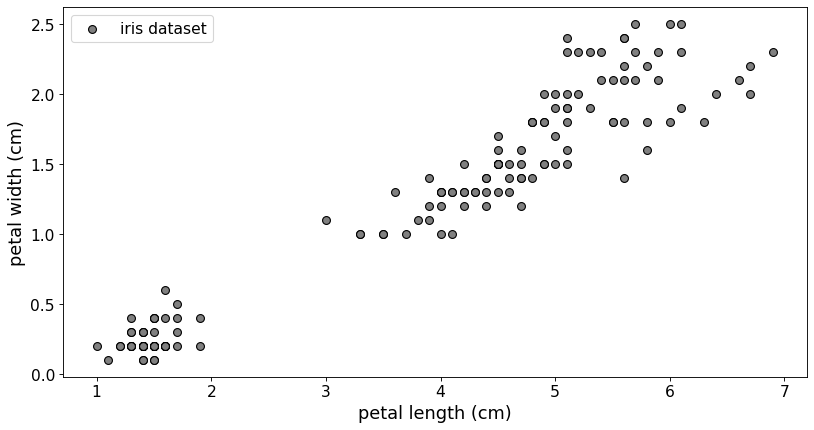

In [18]:
plt.figure(figsize=(12, 6), dpi=80)

plt.scatter(df_dataset[atr1], df_dataset[atr2], color='gray', edgecolors='black', s=50, label='iris dataset')

plt.xlabel(atr1)
plt.ylabel(atr2)
plt.legend()
plt.show()

### Fitting the model

In [19]:
model_kmeans = KMeans(n_clusters=3, random_state=42)

In [20]:
model_kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [21]:
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [22]:
centers = model_kmeans.cluster_centers_
centers

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

### Some checks

In [23]:
print(model_kmeans.labels_)

print(37*'-^')

print(df_dataset['class'].astype(int).values)

print(37*'-^')

print('\nCorrect pred:')
print(sum(model_kmeans.labels_ == df_dataset['class'].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^

Correct pred:
4


In [24]:
df_dataset['class_pred'] = model_kmeans.labels_
df_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_pred
145,6.7,3.0,5.2,2.3,2.0,0
146,6.3,2.5,5.0,1.9,2.0,0
147,6.5,3.0,5.2,2.0,2.0,0
148,6.2,3.4,5.4,2.3,2.0,0
149,5.9,3.0,5.1,1.8,2.0,0


### Plot classes obtained from clustering

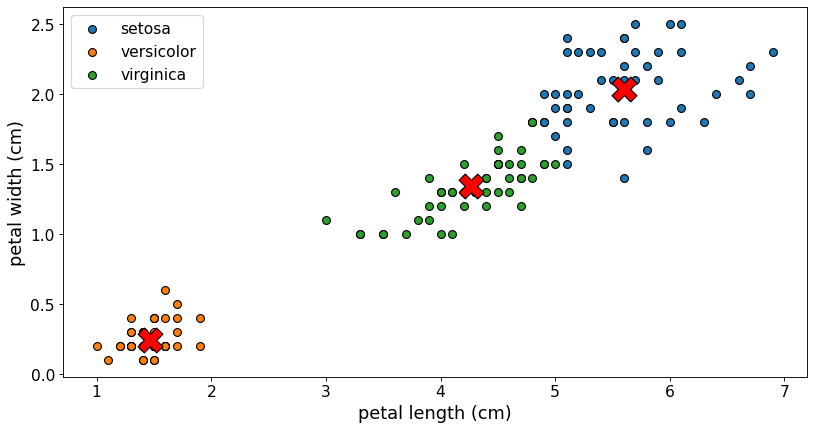

In [25]:
df_setosa, df_versicolor, df_virginica = graphic_by_species(df_dataset, atr1, atr2, atr_class='class_pred', centers=centers)

**Note:** Comparing this clustering with the known classes (available in $y$), we can see that _Iris sestosa_ have petals smaller than _versicolor_. Don't worry, here it is not a problem and we should correct the labels association change its values. E.g., actual 0 will be 2 (_virginica_) and so on.

### Correct names of labels clusters

In [26]:
corrected_classes = []
for val in df_dataset['class_pred'].values:
    if val == 0:
        corrected_classes.append(2)
    elif val == 1:
        corrected_classes.append(0)
    elif val == 2:
        corrected_classes.append(1)

In [27]:
df_dataset['class_pred_correct'] = corrected_classes
df_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_pred,class_pred_correct
0,5.1,3.5,1.4,0.2,0.0,1,0
1,4.9,3.0,1.4,0.2,0.0,1,0
2,4.7,3.2,1.3,0.2,0.0,1,0
3,4.6,3.1,1.5,0.2,0.0,1,0
4,5.0,3.6,1.4,0.2,0.0,1,0


### Correct preds updated

In [28]:
sum(df_dataset['class'] == df_dataset['class_pred_correct'].values)

144

### Plot classes obtained from clustering, now with correct labels

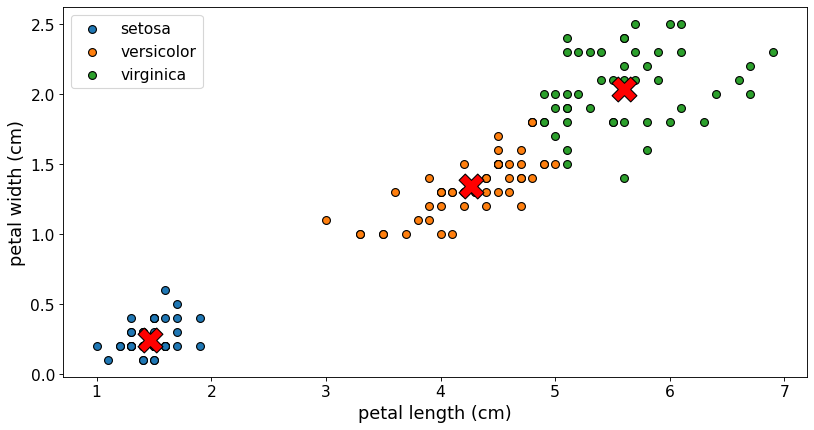

In [29]:
df_setosa, df_versicolor, df_virginica = graphic_by_species(df_dataset, atr1, atr2, atr_class='class_pred_correct', centers=centers)

<a id='3'></a>

# [^](#content) K-Means implementation
___

## Define functions

In [30]:
def kmean(X, k):
    
    np.random.seed(2021) # set seed    
    n_samples = np.shape(X)[0]
    max_iterations = 7 # for a stop criterion
    
    # choose k random positions in the input space
    actual_centers = np.random.rand(k, np.shape(X)[1])*np.mean(X)
    prev_centers = np.random.rand(k, np.shape(X)[1])*np.mean(X)
    
    count = 0
    # repeat until cluster centers stop moving or attain a maximum number of interation
    while np.sum(np.sum(prev_centers - actual_centers)) != 0 and count < max_iterations:

        # compute distances to each cluster center
        distances = np.ones((1, n_samples))*np.sum((X - actual_centers[0,:])**2, axis=1)
        for i in range(k - 1):
            distances = np.append(distances, 
                                  np.ones((1,n_samples))*np.sum((X-actual_centers[i+1,:])**2, 
                                                                axis=1), 
                                  axis=0)

        # assign the point to the nearest cluster center
        cluster_list = distances.argmin(axis=0)
        cluster_list = np.transpose(cluster_list*np.ones((1, n_samples)))        
        
        # move the position of center to the mean of the points in the cluster
        prev_centers = actual_centers.copy()
        for i in range(k):
            cluster_i = np.where(cluster_list==i, 1, 0)
            if sum(cluster_i) > 0:
                actual_centers[i,:] = np.sum(X * cluster_i, axis=0)/np.sum(cluster_i)
        
        count += 1    
    
    return cluster_list, actual_centers

In [31]:
# choose a value for k and run k-means
k = 3
cluster_list, cluster_centers = kmean(X, k)

In [32]:
print(cluster_list.ravel())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [33]:
print(df_dataset['class'].ravel())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [34]:
df_dataset['class_pred_alg'] = cluster_list

In [35]:
df_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_pred,class_pred_correct,class_pred_alg
0,5.1,3.5,1.4,0.2,0.0,1,0,1.0
1,4.9,3.0,1.4,0.2,0.0,1,0,1.0
2,4.7,3.2,1.3,0.2,0.0,1,0,1.0
3,4.6,3.1,1.5,0.2,0.0,1,0,1.0
4,5.0,3.6,1.4,0.2,0.0,1,0,1.0


In [36]:
df_dataset.shape

(150, 8)

### Correct class labels according original dataset

A manual step for better visuailze graphics labels/legends.

In [37]:
corrected_classes_alg = []
for val in df_dataset['class_pred_alg'].values:    
    if val == 0:
        corrected_classes_alg.append(1)
    elif val == 1:
        corrected_classes_alg.append(0)
        pass
    elif val == 2:
        corrected_classes_alg.append(2)

In [38]:
df_dataset['class_pred_correct_alg'] = corrected_classes_alg
df_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_pred,class_pred_correct,class_pred_alg,class_pred_correct_alg
0,5.1,3.5,1.4,0.2,0.0,1,0,1.0,0
1,4.9,3.0,1.4,0.2,0.0,1,0,1.0,0
2,4.7,3.2,1.3,0.2,0.0,1,0,1.0,0
3,4.6,3.1,1.5,0.2,0.0,1,0,1.0,0
4,5.0,3.6,1.4,0.2,0.0,1,0,1.0,0


In [39]:
print(cluster_list.ravel())

print(37*'-^')

print(df_dataset['class'].astype(int).values)

print(37*'-^')

n_corrects = sum(df_dataset['class'] == df_dataset['class_pred_correct_alg'].values)
print(f'\nCorrect pred: {n_corrects}  |  # samples: {len(df_dataset)}')


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^

Correct pred: 144  |  # samples: 150


**Note:** Here we call of correct prediction the cluster choosed that is in according to the known labels.

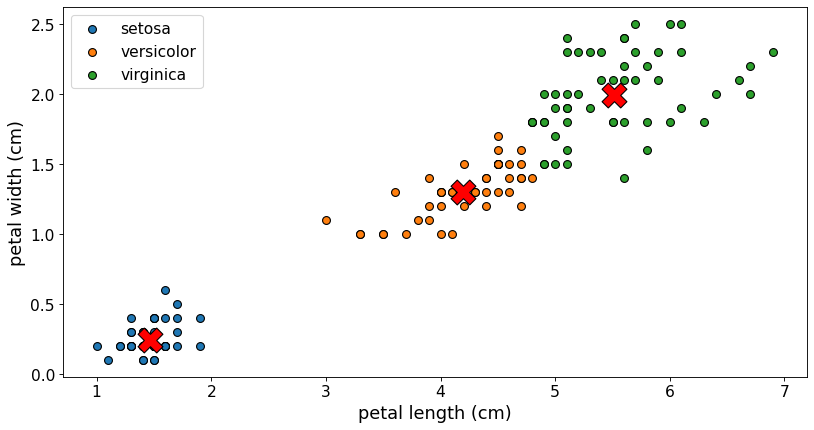

In [40]:
df_setosa, df_versicolor, df_virginica = graphic_by_species(df_dataset, atr1, atr2, atr_class='class_pred_correct_alg', centers=cluster_centers)

<a id='4'></a>

# [^](#content) Compare implementations
___

In [41]:
df_comp = df_dataset[[atr1, atr2, 'class', 'class_pred_correct', 'class_pred_correct_alg']]
df_comp

,petal length (cm),petal width (cm),class,class_pred_correct,class_pred_correct_alg
0,1.4,0.2,0.0,0,0
1,1.4,0.2,0.0,0,0
2,1.3,0.2,0.0,0,0
3,1.5,0.2,0.0,0,0
4,1.4,0.2,0.0,0,0
...,...,...,...,...,...
145,5.2,2.3,2.0,2,2
146,5.0,1.9,2.0,2,2
147,5.2,2.0,2.0,2,2
148,5.4,2.3,2.0,2,2


### Difference between predict with Sklearn and with implementation

In [42]:
n_corrects_sklearn = sum(df_dataset['class'] == df_dataset['class_pred_correct'].values)
n_corrects_alg = sum(df_dataset['class'] == df_dataset['class_pred_correct_alg'].values)

print(f'Total of samples: {len(df_dataset)}')
print(f'Correct pred k-means of Sklearn: {n_corrects_sklearn}')
print(f'Correct pred implementation of k-means: {n_corrects_alg}')

Total of samples: 150
Correct pred k-means of Sklearn: 144
Correct pred implementation of k-means: 144


### Samples that the models not clustering according known classes

### Sklearn

In [43]:
df_sklearn = df_comp[df_comp['class'] != df_comp['class_pred_correct'].values]
df_sklearn.style.set_properties(**{'background-color': 'gray'}, subset=['class', 'class_pred_correct'])


,petal length (cm),petal width (cm),class,class_pred_correct,class_pred_correct_alg
77,5.000000,1.700000,1.000000,2,2
83,5.100000,1.600000,1.000000,2,2
106,4.500000,1.700000,2.000000,1,1
119,5.000000,1.500000,2.000000,1,2
126,4.800000,1.800000,2.000000,1,2
138,4.800000,1.800000,2.000000,1,2


### Implementation

In [44]:
df_alg = df_comp[df_comp['class'] != df_comp['class_pred_correct_alg'].values]
df_alg.style.set_properties(**{'background-color': 'gray'}, subset=['class', 'class_pred_correct_alg'])

,petal length (cm),petal width (cm),class,class_pred_correct,class_pred_correct_alg
52,4.900000,1.500000,1.000000,1,2
70,4.800000,1.800000,1.000000,1,2
72,4.900000,1.500000,1.000000,1,2
77,5.000000,1.700000,1.000000,2,2
83,5.100000,1.600000,1.000000,2,2
106,4.500000,1.700000,2.000000,1,1


<a id='refs'></a>

# [^](#content) References

* Marsland, S. Machine Learning: An Algorithmic Perspective. Chapman and Hall/CRC, 2011.

* Wikipedia:
    - K-means_clustering, [link](https://en.wikipedia.org/wiki/K-means_clustering), 2022.
    - Cluster_analysis, [link](https://en.wikipedia.org/wiki/Cluster_analysis), 2022.
    - Iris_(plant) [link](https://en.wikipedia.org/wiki/Iris_(plant)), 2022.


<a id='next_steps'></a>

# [^](#content) Next steps


- Use others datasets
 
- Compute some metrics for measure performance

- Add a step of reduction of dimensionality and consider more features in the process
